In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [16]:
# importing or loading the dataset
dataset = pd.read_csv('bank_note_data.csv')

dataset

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Image.Var   1372 non-null   float64
 1   Image.Skew  1372 non-null   float64
 2   Image.Curt  1372 non-null   float64
 3   Entropy     1372 non-null   float64
 4   Class       1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [18]:
dataset['Class'].unique()

array([0, 1])

In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Image.Var   1372 non-null   float64
 1   Image.Skew  1372 non-null   float64
 2   Image.Curt  1372 non-null   float64
 3   Entropy     1372 non-null   float64
 4   Class       1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [20]:
features = dataset.drop("Class" , axis = 1)
features = list(features.columns)
target = ["Class"]

In [21]:
features

['Image.Var', 'Image.Skew', 'Image.Curt', 'Entropy']

In [22]:
target

['Class']

### Scaling Data

In [24]:
data_norm = dataset.copy()
sc = StandardScaler()
data_norm[features] = sc.fit(dataset[features]).transform(dataset[features])

### TSNE

In [26]:
tsne = TSNE(learning_rate = 500 , n_components=2)
x_tsne = tsne.fit_transform(data_norm[features])

In [27]:
y_tsne = dataset[target]

In [28]:
pd.DataFrame(x_tsne)

,0,1
0,26.587397,26.442913
1,23.930878,29.608261
2,-32.905781,30.635265
3,63.665455,10.895542
4,-27.100983,18.804810
...,...,...
1367,1.972534,-21.229282
1368,-36.720146,-12.532297
1369,-62.153076,-10.817967
1370,-53.919575,-13.662232


### VISUALIZATION

Text(0.5, 1.0, 'T-SNE')

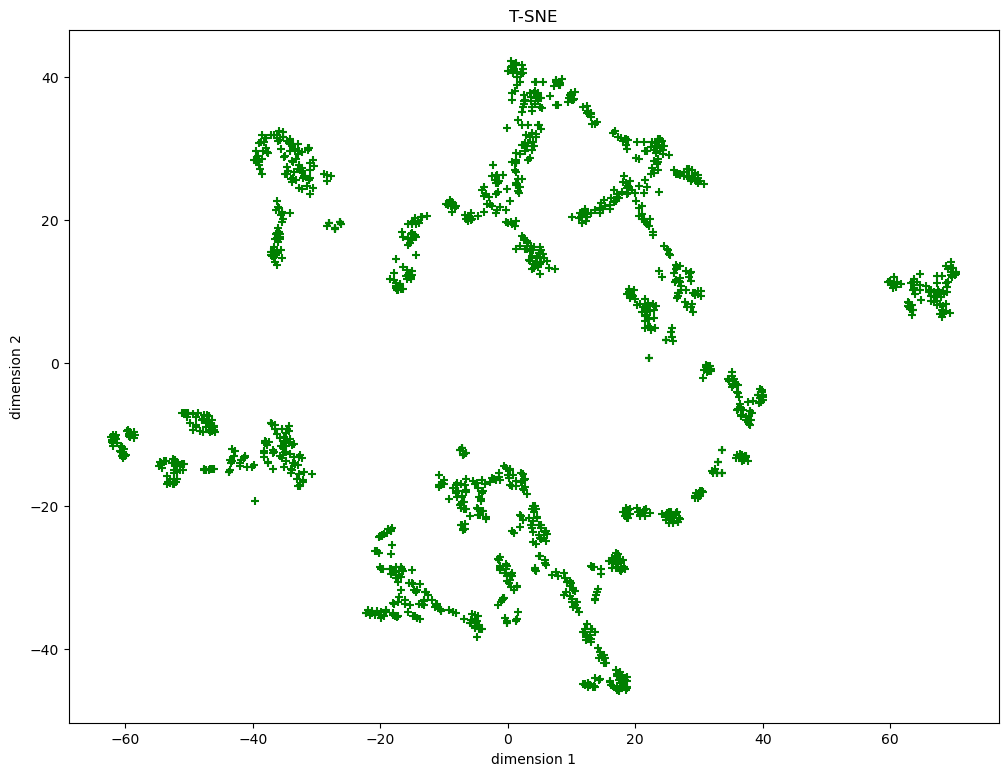

In [30]:
plt.figure(figsize=(12,9))
plt.scatter(x_tsne[np.where(y_tsne == 0) ,0] , x_tsne[np.where(y_tsne == 0) ,1] , color = 'g' , marker = '+')
plt.scatter(x_tsne[np.where(y_tsne == 1) ,0] , x_tsne[np.where(y_tsne == 1) ,1] , color = 'g' , marker = '+')
plt.xlabel("dimension 1")
plt.ylabel("dimension 2")
plt.title("T-SNE")